In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-income-dataset/adult.csv


### In this project, we will discuss:
How to fetch random samples from the Dataset?
isin
between
unique
dropna
replace
duplicated
drop_duplicates
astype
apply
What is Univariate analysis?
What is Bivariate analysis?
Memory Optimization
Optimization
?
Memory Optimization
Optimization


# A) IMPORTING LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

# B) DATA CLEANING & TRANSFORMATION

## 1.Display Top 10 Rows of The Dataset

In [4]:
data=pd.read_csv("/kaggle/input/adult-income-dataset/adult.csv")
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


## 2. Check Last 10 Rows of The Dataset

In [6]:
data.tail(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48832,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
48833,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
48834,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


## 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [7]:
data.shape

(48842, 15)

In [8]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 48842
Number of Columns 15


## 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## 5. Fetch Random Sample From the Dataset (50%)

In [10]:
data.sample(frac=0.50)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
27207,38,Private,470663,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,50,United-States,<=50K
40209,50,Private,151580,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
8590,30,Private,172830,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,3325,0,40,United-States,<=50K
17477,51,Local-gov,176813,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,<=50K
42717,32,Private,227931,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12855,29,Private,146764,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,35,United-States,<=50K
12057,22,State-gov,125010,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,20,United-States,<=50K
92,33,Private,176410,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,5178,0,10,United-States,>50K
7306,39,Private,257250,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,60,United-States,<=50K


In [11]:
data1=data.sample(frac=0.50,random_state=100)     # random_state: gives same set of random dataset
data1

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
12393,37,Private,110331,Prof-school,15,Married-civ-spouse,Other-service,Wife,White,Female,0,0,60,United-States,>50K
48701,23,Private,45834,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,<=50K
17918,28,Private,89718,HS-grad,9,Never-married,Sales,Not-in-family,White,Female,2202,0,48,United-States,<=50K
11352,30,Private,351770,9th,5,Divorced,Other-service,Unmarried,White,Female,0,0,38,United-States,<=50K
36198,31,Private,164190,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48573,41,Private,318046,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,48,United-States,>50K
47252,41,Local-gov,33658,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,45,United-States,>50K
33142,69,Private,312653,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,25,United-States,<=50K
2965,21,?,334593,Some-college,10,Never-married,?,Not-in-family,White,Male,0,0,40,United-States,<=50K


## 6.Check Null Values In The Dataset

In [12]:
data.isnull().sum()   # for row wise checking axis=1

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [13]:
data.isnull().sum(axis=1)       # for column wise checking axis=1

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    0
Length: 48842, dtype: int64

<Axes: >

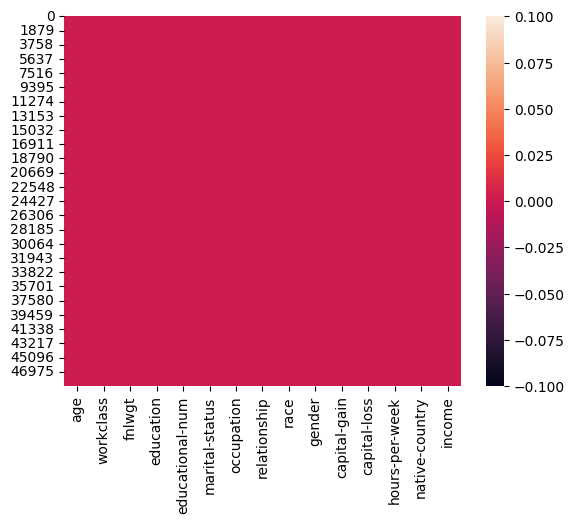

In [14]:
sns.heatmap(data.isnull())

## 7.Perform Data Cleaning [ Replace '?' with NaN ]

In [15]:
data.tail(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48832,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
48833,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
48834,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [16]:
data.isin(['?'])

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
data.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [18]:
import numpy as np

In [19]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [20]:
data['workclass']=data['workclass'].replace('?',np.nan)
data['occupation']=data['occupation'].replace('?',np.nan)
data['native-country']=data['native-country'].replace('?',np.nan)

In [21]:
data.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [22]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

<Axes: >

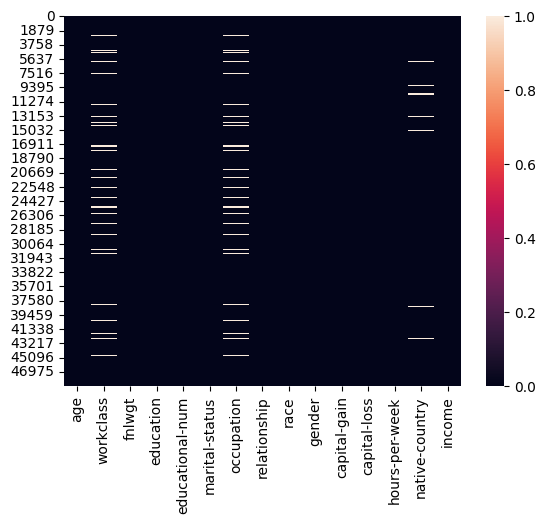

In [23]:
sns.heatmap(data.isnull())

## 8. Drop all The Missing Values

In [24]:
#check % of missing values
percent_missing=data.isnull().sum()*100/len(data)
percent_missing

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

In [25]:
data.dropna(how='any',inplace=True)
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [26]:
data.shape

(45222, 15)

Before Deleting NA values: (48842, 15)

In [27]:
48842-45222

3620

## 9. Check For Duplicate Data and Drop Them


In [28]:
dup=data.duplicated().any()

In [29]:
print("Are there any duplicated values in data?",dup)

Are there any duplicated values in data? True


In [30]:
data=data.drop_duplicates()

In [31]:
data.shape

(45175, 15)

In [32]:
45222-45175

47

## 10. Get overall Statistics about the dataset

In [33]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,2.551740,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [34]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,2.551740,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [35]:
data.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,45175.000000,45175,4.517500e+04,45175,45175.000000,45175,45175,45175,45175,45175,45175.000000,45175.000000,45175.000000,45175,45175
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33262,NaN,14770,NaN,21042,6010,18653,38859,30495,NaN,NaN,NaN,41256,33973
mean,38.556170,NaN,1.897388e+05,NaN,10.119314,NaN,NaN,NaN,NaN,NaN,1102.576270,88.687593,40.942512,NaN,NaN
std,13.215349,NaN,1.056524e+05,NaN,2.551740,NaN,NaN,NaN,NaN,NaN,7510.249876,405.156611,12.007730,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.173925e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783120e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.379030e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [36]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [37]:
data['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [38]:
data['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1])

## 11. Drop the Columns education-num, capital-gain and capital-loss

In [39]:
data=data.drop(['educational-num','capital-gain', 'capital-loss'],axis=1)
data

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


# C) EXPLORATORY DATA ANALYSIS

# Univariate Analysis

Taking one variable at a time and performing analysis on it.
Purpose of Univariate Analysis: To describe the data and identify the existing pattern within it

## 12. What is the distribution of Age Column?

In [40]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [41]:
data['age'].describe()

count    45175.000000
mean        38.556170
std         13.215349
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

<Axes: >

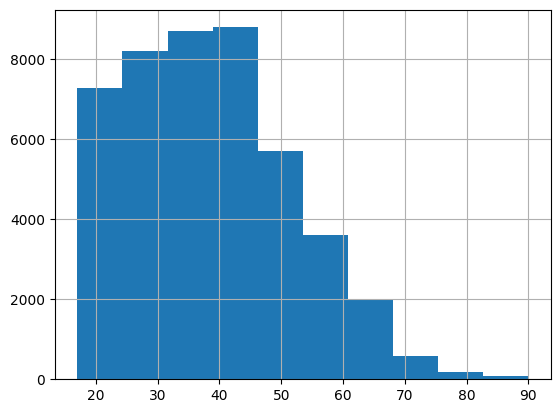

In [42]:
data['age'].hist()

***The maximum number of employees are distributed between the range of 25-48 years of age.***

## 13. Find total number of persons having Age between 17 to 48 (inclusive) using Between method

In [43]:
# w/o using Between method

(data['age']>=17) & (data['age']<=48)

0         True
1         True
2         True
3         True
5         True
         ...  
48837     True
48838     True
48839    False
48840     True
48841    False
Name: age, Length: 45175, dtype: bool

In [44]:
sum((data['age']>=17) & (data['age']<=48))

34858

In [45]:
# by using Between

data['age'].between(17,48)

0         True
1         True
2         True
3         True
5         True
         ...  
48837     True
48838     True
48839    False
48840     True
48841    False
Name: age, Length: 45175, dtype: bool

In [46]:
sum(data['age'].between(17,48))

34858

## 14. Univariate Analysis: Distribution of Work class column

In [47]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [48]:
data['workclass'].describe()

count       45175
unique          7
top       Private
freq        33262
Name: workclass, dtype: object

<Axes: >

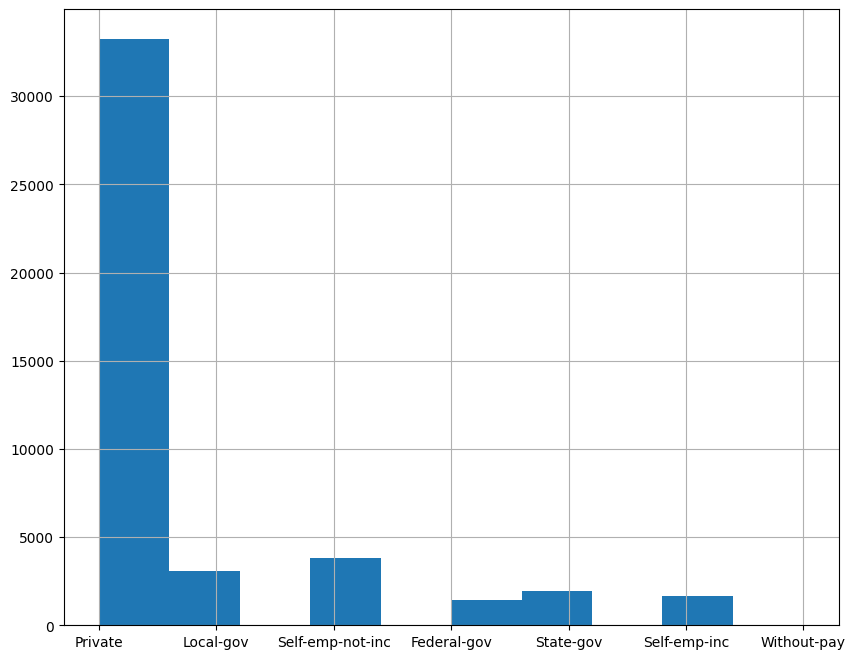

In [49]:
plt.figure(figsize=(10,8))
data['workclass'].hist()

***Maximum number of employees are employed in Private Sector.***

## 15. a) How many people having Bachelors or Masters degree?

In [50]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [51]:
#1) Method 1:

data['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [52]:
data['education']

0                11th
1             HS-grad
2          Assoc-acdm
3        Some-college
5                10th
             ...     
48837      Assoc-acdm
48838         HS-grad
48839         HS-grad
48840         HS-grad
48841         HS-grad
Name: education, Length: 45175, dtype: object

In [53]:
filter1=data['education']=='Bachelors'
filter2=data['education']=='Masters'

In [54]:
print("Total students with Bachelors degree: ",filter1.value_counts())

Total students with Bachelors degree:  education
False    37616
True      7559
Name: count, dtype: int64


In [55]:
bachelor_count = (data['education'] == 'Bachelors').sum()
print("Total no. of people having Bachelors degree= ",bachelor_count)

Total no. of people having Bachelors degree=  7559


In [56]:
masters_count = (data['education'] == 'Masters').sum()
print("Total no. of people having Masters degree= ",masters_count)

Total no. of people having Masters degree=  2513


In [57]:
# print records with education values having Bachelors and Masters 

data[filter1 | filter2]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
11,36,Federal-gov,212465,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,United-States,<=50K
15,43,Private,346189,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K
20,34,Private,107914,Bachelors,Married-civ-spouse,Tech-support,Husband,White,Male,47,United-States,>50K
23,25,Private,220931,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,43,Peru,<=50K
24,25,Private,205947,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48817,34,Private,160216,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Female,55,United-States,>50K
48819,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,45,United-States,>50K
48825,31,Private,199655,Masters,Divorced,Other-service,Not-in-family,Other,Female,30,United-States,<=50K
48834,32,Private,116138,Masters,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,11,Taiwan,<=50K


In [58]:
len(data[filter1 | filter2])

10072

In [59]:
# Method 2: 

filtered_data=data['education'].isin(['Bachelors','Masters']).sum()
filtered_data

10072

In [60]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

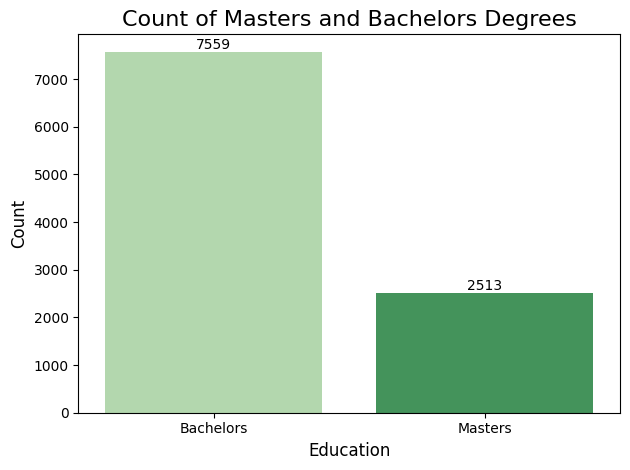

In [61]:
# Filter the data for Masters and Bachelors
filtered_data = data[data['education'].isin(['Masters', 'Bachelors'])]

# Plotting
ax = sns.countplot(x='education', data=filtered_data, palette='Greens')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count of Masters and Bachelors Degrees', fontsize=16)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## b) Overall Educational Background of the Employees

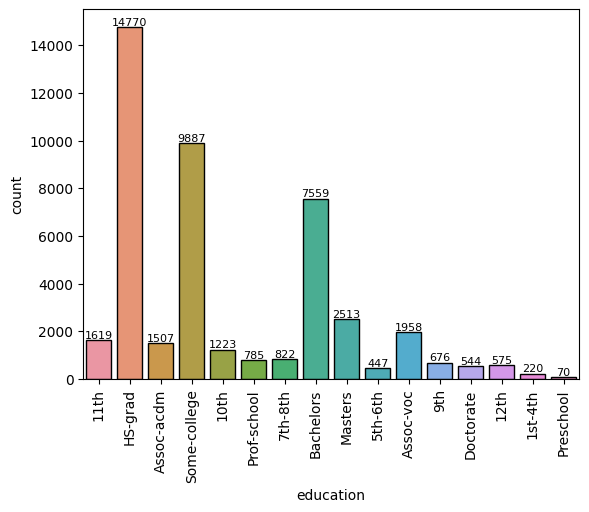

In [62]:
ax=sns.countplot(x='education',data=data, edgecolor = 'Black')
for bars in ax.containers:
    ax.bar_label(bars, fontsize=8,fmt='%.0f')
plt.xticks(rotation=90, fontsize=10)
plt.show()

# Bivariate Analysis

It is used to find relationship between 2 different vaiables. Helps to create Scatterplot or Box plot

In [63]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

## 16. Plot box plots for Age Vs Income *(representing Bivariate Analysis)*.

<Axes: xlabel='income', ylabel='age'>

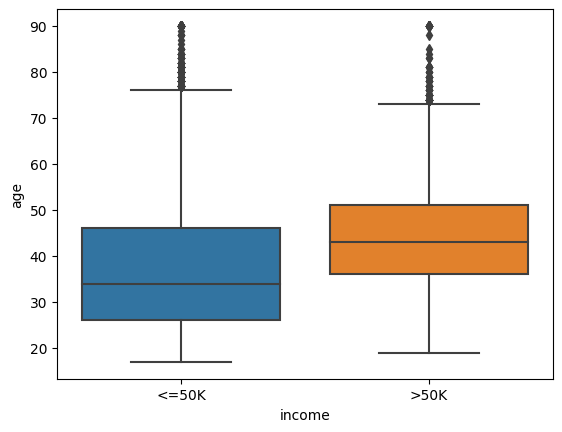

In [64]:
sns.boxplot(x='income',y='age',data=data)

## 17. Replace Salary Values ['<=50K', '>50K'] with 0 and 1

In [65]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [66]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [67]:
# find no. of records for each in income column

data['income'].value_counts()

income
<=50K    33973
>50K     11202
Name: count, dtype: int64

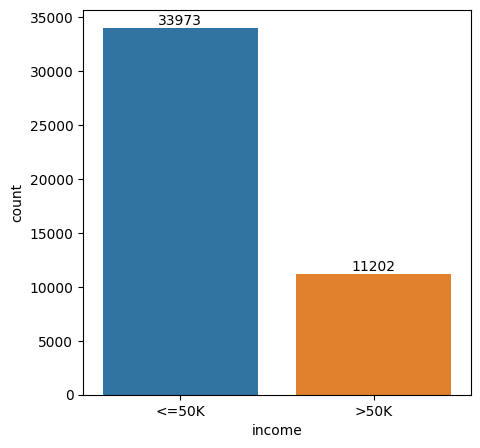

In [68]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=data['income'])

for bars in ax.containers:
    ax.bar_label(bars)

In [69]:
# METHOD 1:

def income_data(income):
    if income=='<=50K':
        return 0
    else:
        return 1

In [70]:
data['Encoded_Salary']=data['income'].apply(income_data)

In [71]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Encoded_Salary
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K,1
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K,0


In [72]:
# METHOD 2: using Replace

data.replace(to_replace=['<=50K', '>50K'],value=[0,1],inplace=True)

/tmp/ipykernel_17/1998088477.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(to_replace=['<=50K', '>50K'],value=[0,1],inplace=True)


In [73]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Encoded_Salary
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1,1
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,0,0


## 18. a) Which Workclass gets the highest Salary?

In [74]:
data.groupby('workclass')['income'].mean().sort_values(ascending=False)

workclass
Self-emp-inc        0.554407
Federal-gov         0.390469
Local-gov           0.295161
Self-emp-not-inc    0.279051
State-gov           0.267215
Private             0.217816
Without-pay         0.095238
Name: income, dtype: float64

***By taking the mean of the income we found that Self-employed people get the highest salary.***

## b) Which occupation is getting the highest Salary?

In [75]:
data.groupby('occupation')['income'].mean().sort_values(ascending=False)

occupation
Exec-managerial      0.479097
Prof-specialty       0.450258
Protective-serv      0.314872
Tech-support         0.289641
Armed-Forces         0.285714
Sales                0.269195
Craft-repair         0.225291
Transport-moving     0.206390
Adm-clerical         0.136585
Machine-op-inspct    0.122766
Farming-fishing      0.116610
Handlers-cleaners    0.066015
Other-service        0.040791
Priv-house-serv      0.013043
Name: income, dtype: float64

***By analyisng the mean values of the Income field we can see that Executive Managers and Prof-Specialty are the top paying occupations.***

## 19. Who has better chance to get Salary >50K, Male or Female?

In [76]:
data.groupby('gender')['income'].mean().sort_values(ascending=False)

gender
Male      0.312609
Female    0.113692
Name: income, dtype: float64

***By analysing the income received by respective genders, we can say that males employees are more likely to receive >=50K salary as compared to females.***

## 20. Convert Workclass Column Datatype to Category Datatype.

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45175 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45175 non-null  int64 
 1   workclass       45175 non-null  object
 2   fnlwgt          45175 non-null  int64 
 3   education       45175 non-null  object
 4   marital-status  45175 non-null  object
 5   occupation      45175 non-null  object
 6   relationship    45175 non-null  object
 7   race            45175 non-null  object
 8   gender          45175 non-null  object
 9   hours-per-week  45175 non-null  int64 
 10  native-country  45175 non-null  object
 11  income          45175 non-null  int64 
 12  Encoded_Salary  45175 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 4.8+ MB


In [78]:
data['workclass']=data['workclass'].astype('category')

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45175 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45175 non-null  int64   
 1   workclass       45175 non-null  category
 2   fnlwgt          45175 non-null  int64   
 3   education       45175 non-null  object  
 4   marital-status  45175 non-null  object  
 5   occupation      45175 non-null  object  
 6   relationship    45175 non-null  object  
 7   race            45175 non-null  object  
 8   gender          45175 non-null  object  
 9   hours-per-week  45175 non-null  int64   
 10  native-country  45175 non-null  object  
 11  income          45175 non-null  int64   
 12  Encoded_Salary  45175 non-null  int64   
dtypes: category(1), int64(5), object(7)
memory usage: 4.5+ MB


***The data type of workclass has changed to category which has also reduced the memory usage.***

The ***category*** datatype in pandas is used to optimize the storage and performance of columns that have a limited number of unique values (categories). It is particularly useful for categorical data, where the column values represent discrete categories or groups.

## 21. Find number of employees in respective Workclass.

In [80]:
data

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Encoded_Salary
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1,1
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0,0
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1,1
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0,0
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0,0


In [81]:
data['workclass'].value_counts()

workclass
Private             33262
Self-emp-not-inc     3795
Local-gov            3100
State-gov            1946
Self-emp-inc         1645
Federal-gov          1406
Without-pay            21
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


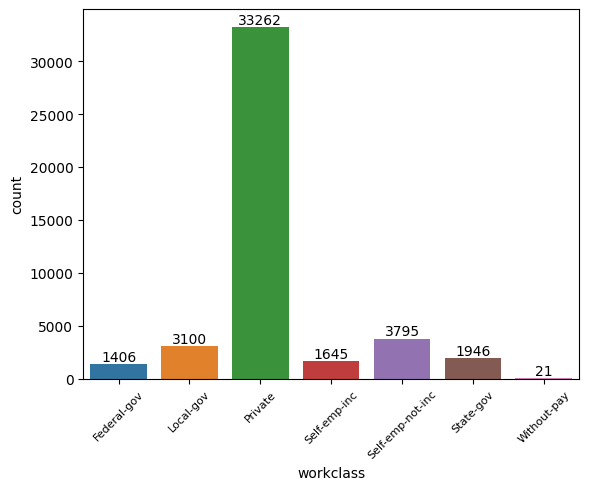

In [82]:
ax=sns.countplot(x='workclass',data=data)

for bars in ax.containers:
    ax.bar_label(bars, fmt="%.0f")
plt.xticks(rotation=45, fontsize=8)
plt.show()

***Private and Self-employed sectors have the maximum number of people.***

## 22. Racial Analysis of the Employees.

In [83]:
data['race'].value_counts()

race
White                 38859
Black                  4227
Asian-Pac-Islander     1301
Amer-Indian-Eskimo      435
Other                   353
Name: count, dtype: int64

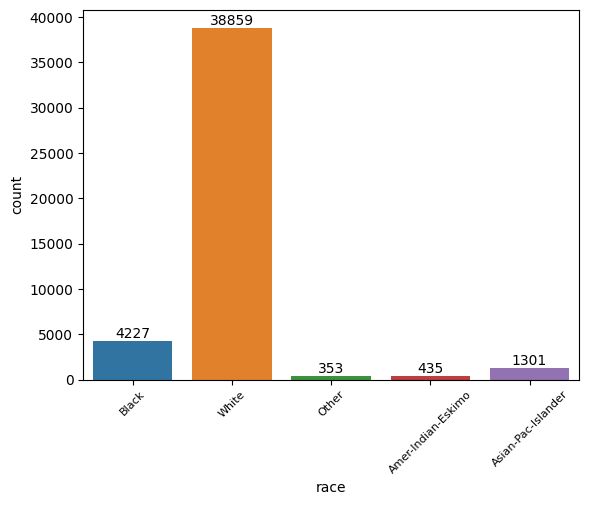

In [84]:
ax=sns.countplot(x='race',data=data)
for bars in ax.containers:
    ax.bar_label(bars,fmt="%0.f")

plt.xticks(rotation=45, fontsize=8)
plt.show()

***Among the total employees, maximum people are native White.***

## 23. Gender Analysis

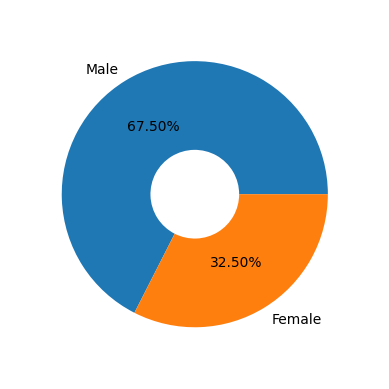

In [85]:
pie =  data['gender'].value_counts()
fig, ax = plt.subplots()

ax.pie(pie, labels=pie.index, autopct='%1.2f%%', radius=0.9, wedgeprops=dict(width=0.6))
ax.set(aspect="equal")

plt.show()

## 24. Name the different countries from where the employees belong.

In [86]:
data['native-country'].nunique()

41

In [87]:
data['native-country'].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

## 24. Analyse which Workclass is working Overtime per week.

In [88]:
data

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Encoded_Salary
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1,1
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0,0
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1,1
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0,0
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0,0


In [89]:
data['hours-per-week'].value_counts()

hours-per-week
40    21332
50     4091
45     2600
60     2085
35     1773
      ...  
79        1
69        1
87        1
94        1
82        1
Name: count, Length: 96, dtype: int64

In [90]:
# Filter people working overtime
overtime=data[data['hours-per-week']>40]
overtime_count=overtime.value_counts()
overtime_count

age  workclass         fnlwgt  education     marital-status      occupation       relationship   race   gender  hours-per-week  native-country  income  Encoded_Salary
35   Private           154410  Bachelors     Married-civ-spouse  Exec-managerial  Husband        White  Male    50              United-States   1       1                 2
38   Private           108140  Masters       Married-civ-spouse  Prof-specialty   Husband        White  Male    50              United-States   1       1                 2
45   Self-emp-not-inc  40666   Assoc-voc     Married-civ-spouse  Farming-fishing  Husband        White  Male    60              United-States   0       0                 2
     Local-gov         236586  Masters       Married-civ-spouse  Prof-specialty   Husband        White  Male    55              United-States   1       1                 1
                       167159  Bachelors     Married-civ-spouse  Protective-serv  Husband        White  Male    50              United-States   1

In [91]:
work_hour=data.groupby('workclass')['hours-per-week'].sum().sort_values(ascending=False)
work_hour

/tmp/ipykernel_17/2476592693.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  work_hour=data.groupby('workclass')['hours-per-week'].sum().sort_values(ascending=False)


workclass
Private             1339233
Self-emp-not-inc     168613
Local-gov            126683
Self-emp-inc          79950
State-gov             76131
Federal-gov           58255
Without-pay             713
Name: hours-per-week, dtype: int64

In [92]:
# CALCULATING 5 OF EMPLOYEES DOING OVERTIME w.r.t WORKCLASS AND TOTAL COUNT

overtime = data[data['hours-per-week'] > 40]

# Calculate total counts for each workclass (overtime)
overtime_counts = overtime['workclass'].value_counts()

# Calculate overall total counts for each workclass
workclass_counts = data['workclass'].value_counts()

total_records=len(data)

# Calculate percentage of people working overtime in each workclass
overtime_percentage = (overtime_counts / workclass_counts * 100).round(2).apply(lambda x: f"{x}%")
total_percentage = (overtime_counts / total_records * 100).round(2).apply(lambda x: f"{x}%")

# Combine results into a DataFrame for better visualization
result = pd.DataFrame({
    'Workclass_Count': workclass_counts,
    'Overtime Count': overtime_counts,
    'Workclass_OT%': overtime_percentage,
    'Total_OT%': total_percentage
}).fillna(0)  # Fill NaN with 0 for workclasses with no overtime workers

print("Total no. of employees:",total_records)
print(result)

Total no. of employees: 45175
                  Workclass_Count  Overtime Count Workclass_OT% Total_OT%
workclass                                                                
Federal-gov                  1406             305        21.69%     0.68%
Local-gov                    3100             839        27.06%     1.86%
Private                     33262            9375        28.19%    20.75%
Self-emp-inc                 1645            1019        61.95%     2.26%
Self-emp-not-inc             3795            1819        47.93%     4.03%
State-gov                    1946             406        20.86%      0.9%
Without-pay                    21               6        28.57%     0.01%


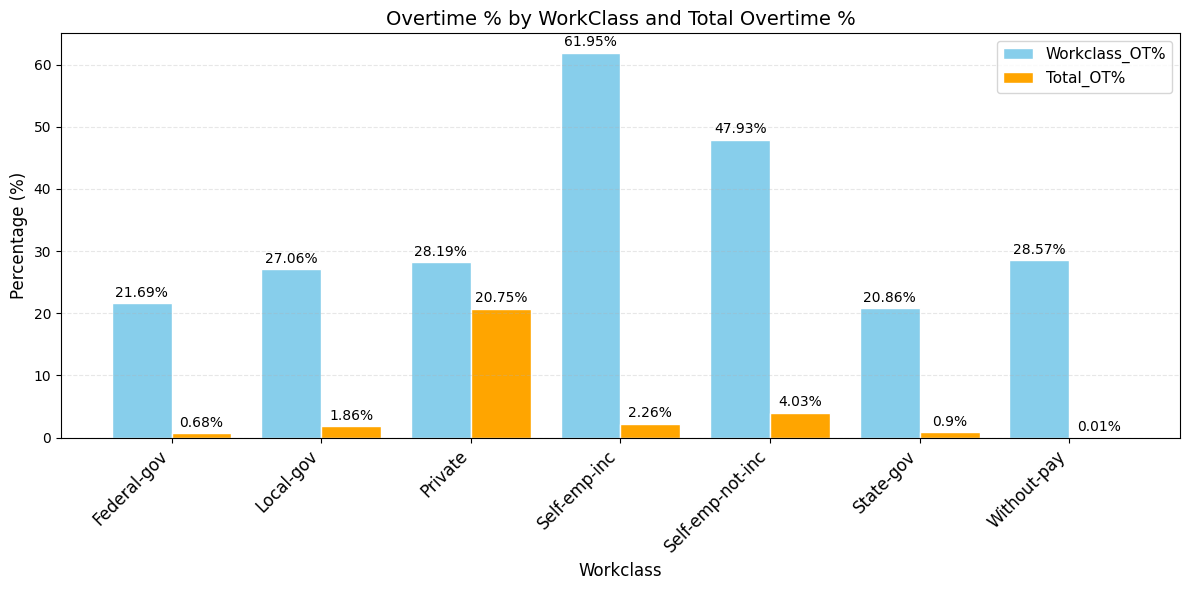

In [93]:
#PLOT

# Convert 'Overtime%' and 'Total Overtime%' to numeric (remove the '%' sign)
result['Workclass_OT%'] = result['Workclass_OT%'].str.rstrip('%').astype(float)
result['Total_OT%'] = result['Total_OT%'].str.rstrip('%').astype(float)

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot grouped bars for 'Overtime%' and 'Total Overtime%'
x = range(len(result.index))  # Positions for bars
bar_width = 0.4  # Width of each bar

# Plotting bars
plt.bar(x, result['Workclass_OT%'], width=bar_width, label='Workclass_OT%', color='skyblue', edgecolor='white')
plt.bar([i + bar_width for i in x], result['Total_OT%'], width=bar_width, label='Total_OT%', color='orange', edgecolor='white')

# Adding labels and title
plt.title('Overtime % by WorkClass and Total Overtime %', fontsize=14)
plt.xlabel('Workclass', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks([i + bar_width / 2 for i in x], result.index, rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adding percentage labels above the bars
for i, val in enumerate(result['Workclass_OT%']):
    plt.text(i, val + 1, f"{val}%", ha='center', fontsize=10)

for i, val in enumerate(result['Total_OT%']):
    plt.text(i + bar_width, val + 1, f"{val}%", ha='center', fontsize=10)

# Add legend
plt.legend(fontsize=11)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [94]:
data

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Encoded_Salary
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1,1
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0,0
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1,1
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0,0
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0,0


## 25. Age Group Analysis

In [95]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income', 'Encoded_Salary'],
      dtype='object')

In [96]:
data['age'].max()

90

In [97]:
data['age'].min()

17

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


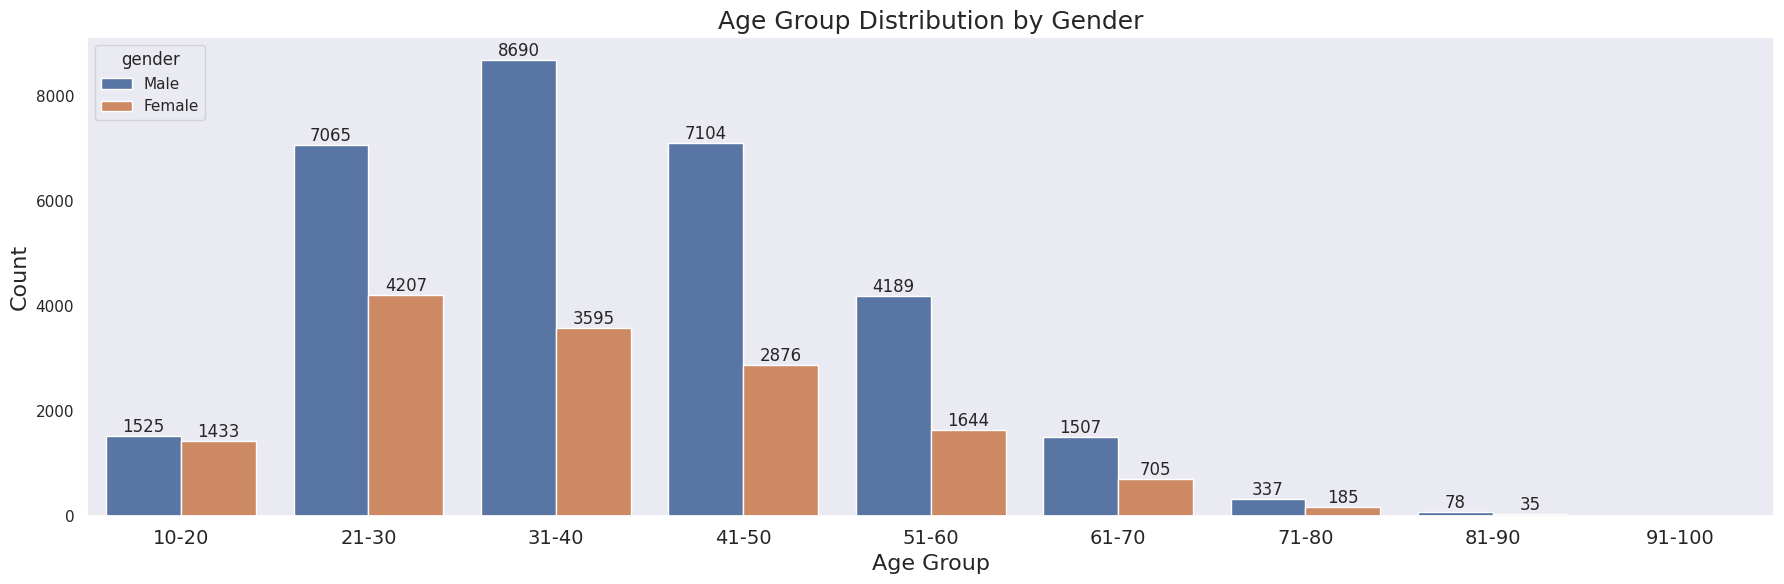

In [98]:
# Define age bins and labels
bins = [10, 20, 30, 40, 50, 60,70, 80,90, 100]
age_group_order = ['10-20', '21-30', '31-40', '41-50', '51-60','61-70', '71-80','81-90','91-100']

# Create an 'age_group' column in the dataset
data['age_group'] = pd.cut(data['age'], bins=bins, labels=age_group_order, right=True)

# Plot the countplot with hue for gender
sns.set(rc={'figure.figsize': (18, 6)})
ax = sns.countplot(x='age_group', data=data, hue='gender', order=age_group_order)

# Add labels to bars
for bars in ax.containers:
    ax.bar_label(bars, fontsize=12)

# Customize plot appearance
ax.grid(False)
ax.set_xlabel('Age Group', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.set_title('Age Group Distribution by Gender', fontsize=18)

# Show plot
plt.tight_layout()
plt.show()

***The maximum number of employees belong to the age group of 21-41 years and across all the age groups, male constitutes the major population.***

In [99]:
data

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Encoded_Salary,age_group
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0,0,21-30
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0,0,31-40
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1,1,21-30
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1,1,41-50
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,0,0,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0,0,21-30
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1,1,31-40
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0,0,51-60
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0,0,21-30


## 26. Analyse Age Vs Workclass Distribution

/tmp/ipykernel_17/1336848767.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_workclass_distribution = data.groupby(['age_group', 'workclass']).size().unstack(fill_value=0)


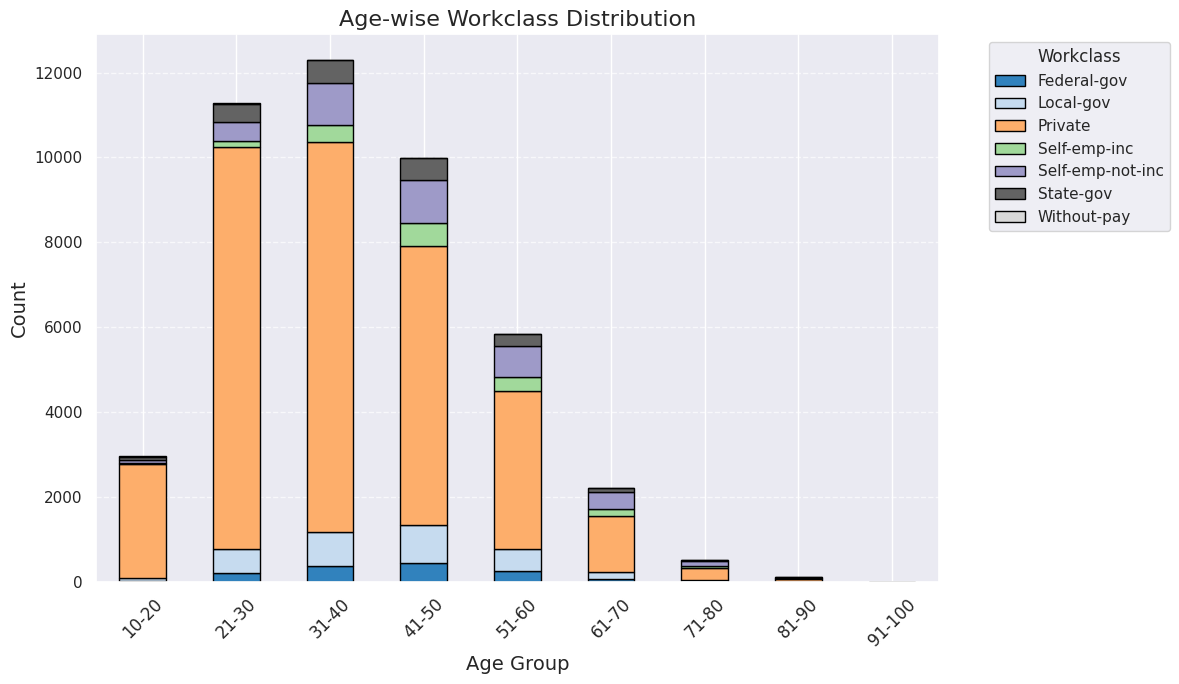

In [100]:
# Group by age_group and workclass, and get counts
age_workclass_distribution = data.groupby(['age_group', 'workclass']).size().unstack(fill_value=0)

# Plot stacked bar chart
age_workclass_distribution.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20c', edgecolor='black')

# Adding labels and title
plt.title('Age-wise Workclass Distribution', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Workclass', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### Alternate Visualization for Age Vs Work Class

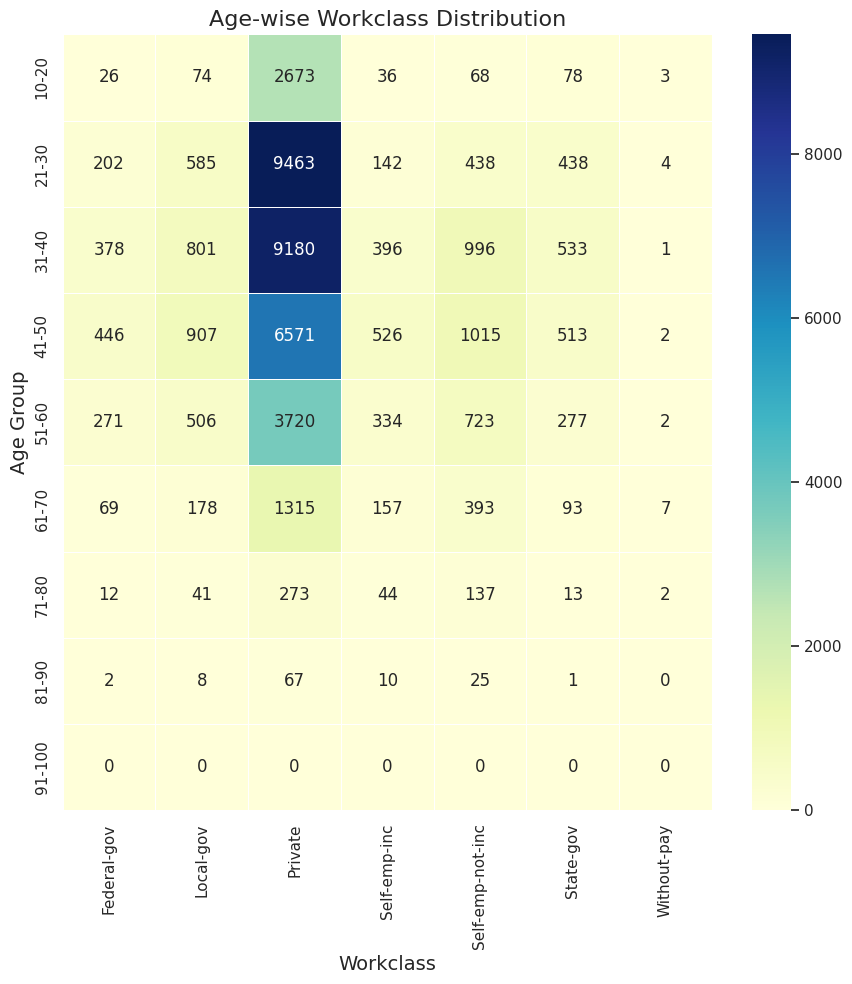

In [101]:
# Create a heatmap-friendly DataFrame
plt.figure(figsize=(9, 10))
sns.heatmap(age_workclass_distribution, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)

# Add labels and title
plt.title('Age-wise Workclass Distribution', fontsize=16)
plt.xlabel('Workclass', fontsize=14)
plt.ylabel('Age Group', fontsize=14)

plt.tight_layout()
plt.show()

## 27. Marital Status Analysis of the Employees

In [102]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income', 'Encoded_Salary', 'age_group'],
      dtype='object')

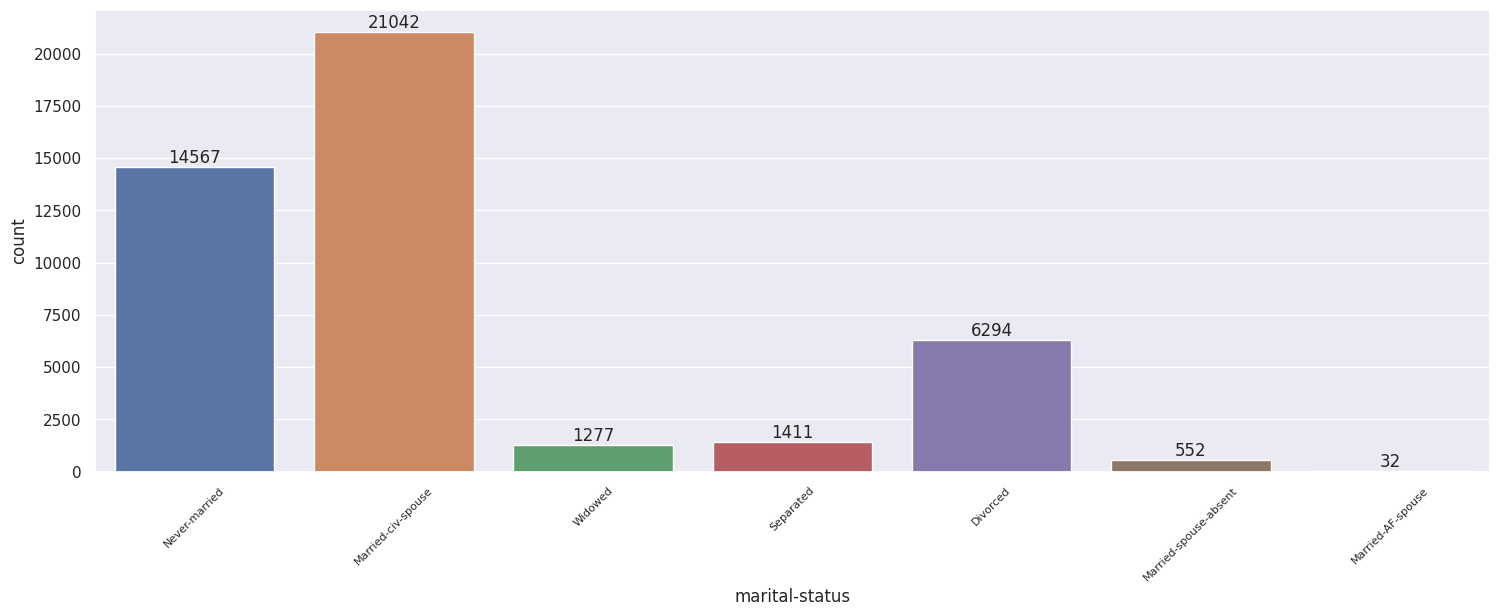

In [103]:
ax=sns.countplot(x='marital-status',data=data)

for bars in ax.containers:
    ax.bar_label(bars, fmt="%.0f")
plt.xticks(rotation=45, fontsize=8)
plt.show()

## 29. Age wise Marital Status Distribution

/tmp/ipykernel_17/1436667864.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_marital_distribution = data.groupby(['age_group', 'marital-status']).size().unstack(fill_value=0)


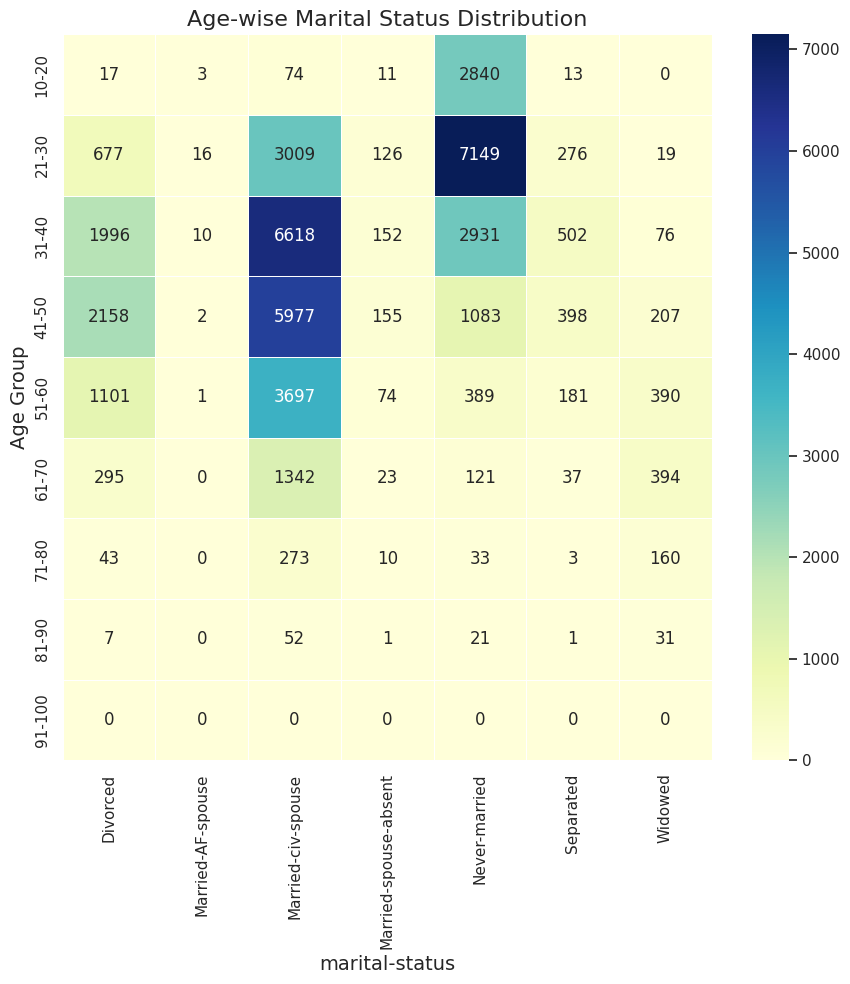

In [104]:
# Create a heatmap-friendly DataFrame

age_marital_distribution = data.groupby(['age_group', 'marital-status']).size().unstack(fill_value=0)
plt.figure(figsize=(9, 10))
sns.heatmap(age_marital_distribution, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)

# Add labels and title
plt.title('Age-wise Marital Status Distribution', fontsize=16)
plt.xlabel('marital-status', fontsize=14)
plt.ylabel('Age Group', fontsize=14)

plt.tight_layout()
plt.show()

No. of Divorced cases is high in the age group of 31-50 years. 
No. of married employees with civilian spouses is in the range of 21-90 years.
No. of unmarried employees is high in the age group of